In [2]:
import torch
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

In [11]:
class ShapesDatasets(Dataset):
    def __init__(self, root_dir, transform=None):
        self.datasets = datasets.ImageFolder(root=root_dir, transform=transform)
    
    def __len__(self):
        return len(self.datasets)
    
    def __getitem__(self, idx):
        return self.datasets[idx]

In [12]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),

    transforms.RandomHorizontalFlip(p=0.5),

    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [13]:
file_path = "./Datasets/shapes/"
dataset = ShapesDatasets(root_dir=file_path, transform=transform)

In [14]:
len(dataset)

300

In [16]:
train_indices, test_indices = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_indices[:5], test_indices[:5]

([232, 59, 6, 185, 173], [203, 266, 152, 9, 233])

In [17]:
import torch.utils
import torch.utils.data


train_loader = DataLoader(dataset, batch_size=16, sampler=torch.utils.data.RandomSampler(train_indices))

test_loader = DataLoader(dataset, batch_size=16, sampler=torch.utils.data.SequentialSampler(test_indices))

In [18]:
for images, labels in train_loader:
    print("Batch images shapes: ", images.shape)
    print("Batch labels shapes: ", labels.shape)

Batch images shapes:  torch.Size([16, 3, 28, 28])
Batch labels shapes:  torch.Size([16])
Batch images shapes:  torch.Size([16, 3, 28, 28])
Batch labels shapes:  torch.Size([16])
Batch images shapes:  torch.Size([16, 3, 28, 28])
Batch labels shapes:  torch.Size([16])
Batch images shapes:  torch.Size([16, 3, 28, 28])
Batch labels shapes:  torch.Size([16])
Batch images shapes:  torch.Size([16, 3, 28, 28])
Batch labels shapes:  torch.Size([16])
Batch images shapes:  torch.Size([16, 3, 28, 28])
Batch labels shapes:  torch.Size([16])
Batch images shapes:  torch.Size([16, 3, 28, 28])
Batch labels shapes:  torch.Size([16])
Batch images shapes:  torch.Size([16, 3, 28, 28])
Batch labels shapes:  torch.Size([16])
Batch images shapes:  torch.Size([16, 3, 28, 28])
Batch labels shapes:  torch.Size([16])
Batch images shapes:  torch.Size([16, 3, 28, 28])
Batch labels shapes:  torch.Size([16])
Batch images shapes:  torch.Size([16, 3, 28, 28])
Batch labels shapes:  torch.Size([16])
Batch images shapes: 

In [19]:
index = torch.randint(len(dataset), size=(1,)).item()
index

109

In [21]:
import matplotlib.pyplot as plt

In [22]:
image, label = dataset[index]
label, image.shape

(1, torch.Size([3, 28, 28]))

In [23]:
image = image.permute(1,2,0).numpy()
image.shape

(28, 28, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


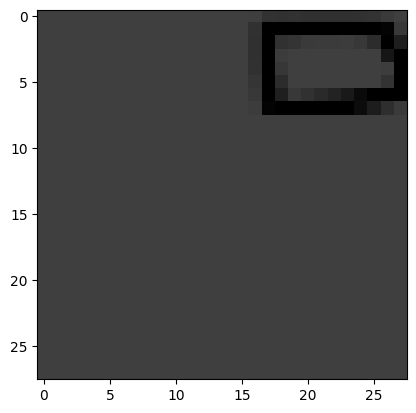

In [24]:
plt.imshow(0.5 * image * 0.5)